In [1]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object

In [5]:
#Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
data = pd.read_csv('Fraud_check.csv')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["Undergrad"]=le.fit_transform(data["Undergrad"])
data["Marital.Status"]=le.fit_transform(data["Marital.Status"])
data["Urban"]=le.fit_transform(data["Urban"])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [8]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data=data.assign(TaxInc=pd.cut(data['Taxable.Income'],
                               bins=[10002,30000,99620],
                               labels=['Risky', 'Good']))
data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


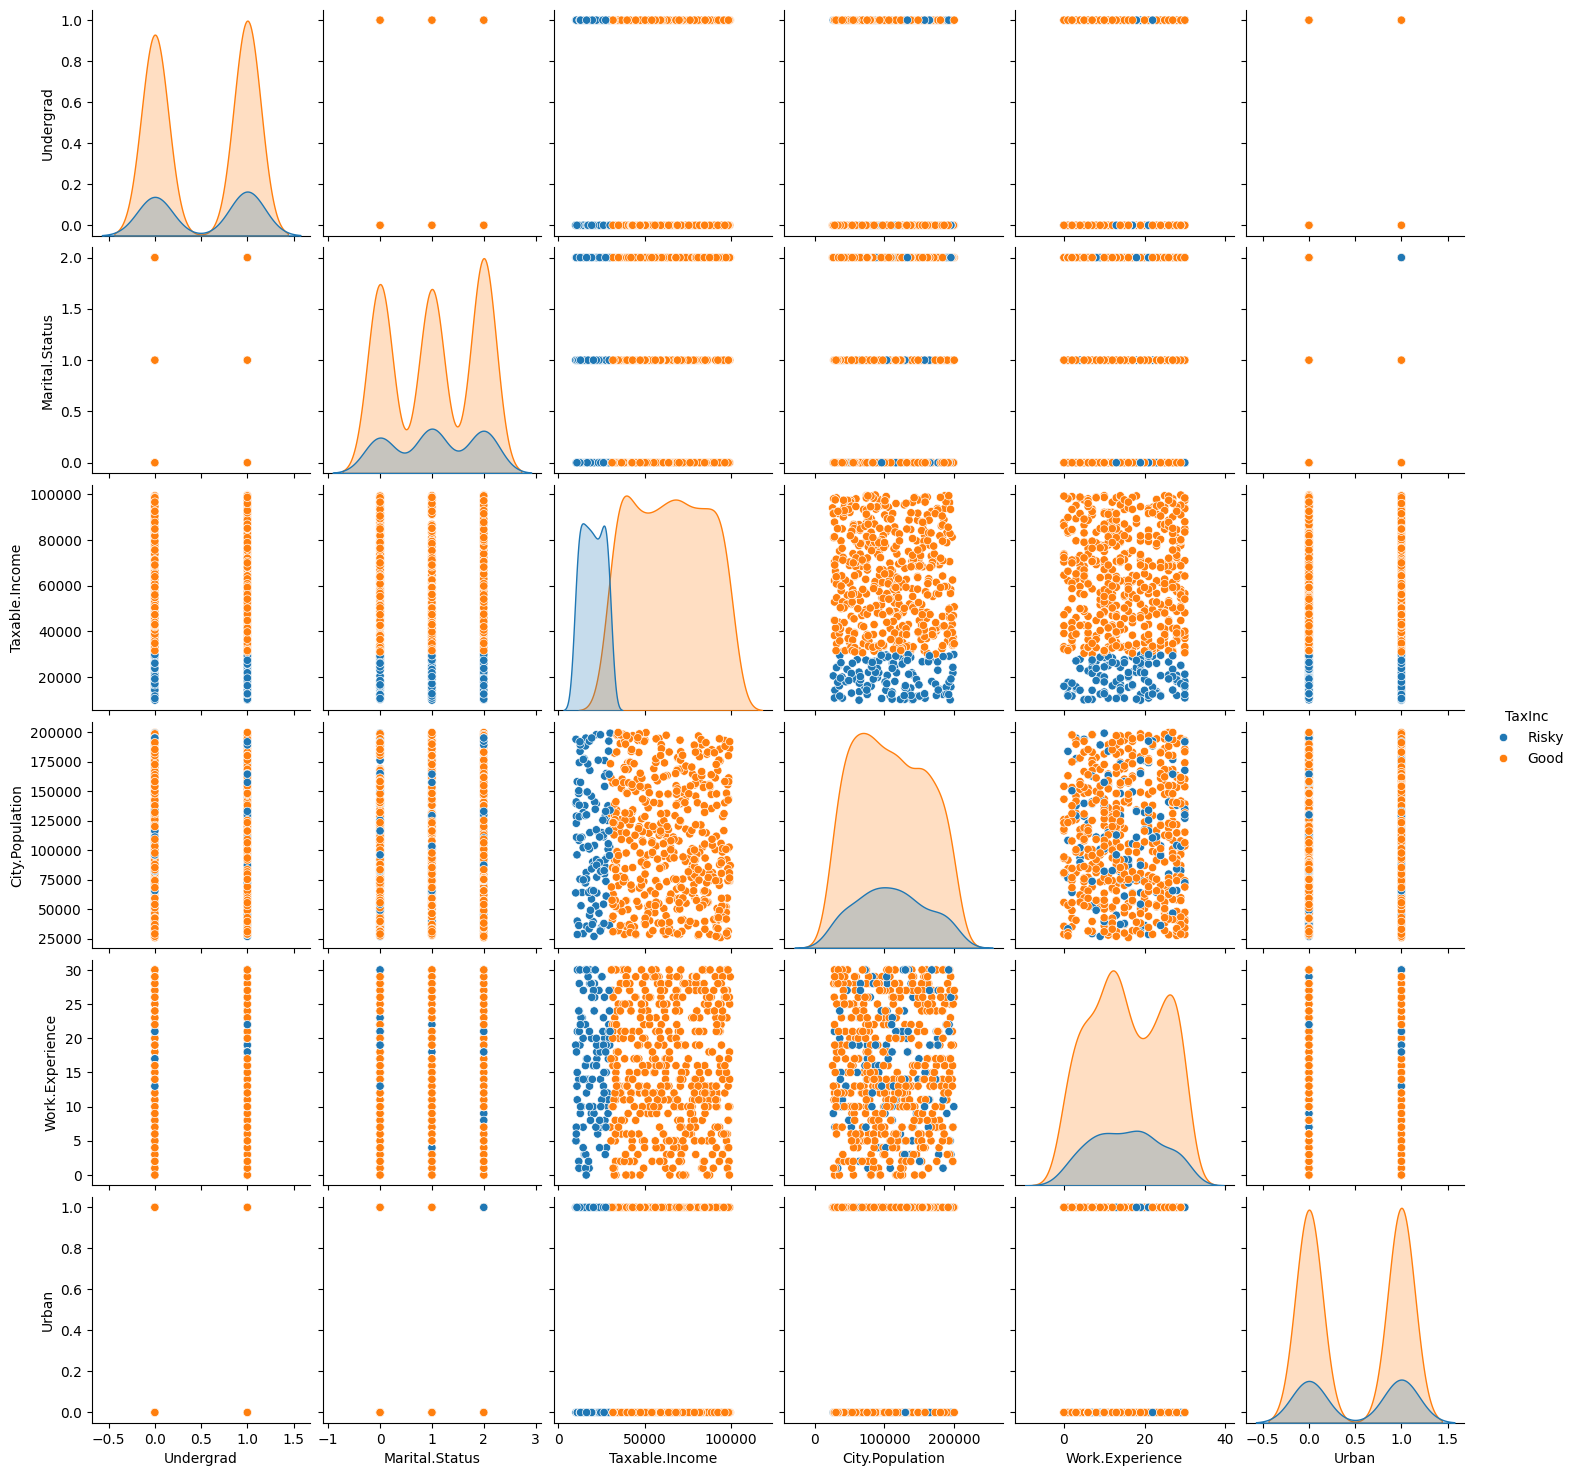

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = "TaxInc")

In [11]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(data,columns=['Urban'], drop_first=True)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,TaxInc,Urban_1
0,0,2,68833,50047,10,Good,True
1,1,0,33700,134075,18,Good,True
2,0,1,36925,160205,30,Good,True
3,1,2,50190,193264,15,Good,True
4,0,1,81002,27533,28,Good,False


In [12]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
df['TaxInc']=df['TaxInc'].map({'Risky':0,'Good':1})
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,TaxInc,Urban_1
0,0,2,68833,50047,10,1,True
1,1,0,33700,134075,18,1,True
2,0,1,36925,160205,30,1,True
3,1,2,50190,193264,15,1,True
4,0,1,81002,27533,28,1,False
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,True
596,1,0,69967,55369,2,1,True
597,0,0,47334,154058,0,1,True
598,1,1,98592,180083,17,1,False


In [13]:
x=df.iloc[:,1:5]
y=df['TaxInc']

In [14]:
x.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,2,68833,50047,10
1,0,33700,134075,18
2,1,36925,160205,30
3,2,50190,193264,15
4,1,81002,27533,28


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: TaxInc, dtype: category
Categories (2, int64): [0 < 1]

In [17]:
df['TaxInc'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [18]:
df.TaxInc.value_counts()

TaxInc
1    476
0    124
Name: count, dtype: int64

In [19]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'TaxInc',
 'Urban_1']

In [20]:
#Descriptive statistics for each column
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147
min,0.000000,0.000000,10003.000000,25779.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000


In [21]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,TaxInc,Urban_1
0,0,2,68833,50047,10,1,True
1,1,0,33700,134075,18,1,True
2,0,1,36925,160205,30,1,True
3,1,2,50190,193264,15,1,True
4,0,1,81002,27533,28,1,False


In [22]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,
                          max_depth=6,
                          max_samples=0.6,
                          max_features=0.7,
                          random_state=42)
#Model Fitting
RFR.fit(x_train,y_train)
#Random Forest Prediction
y_pred_train=RFR.predict(x_train)
y_pred_test=RFR.predict(x_test)

In [24]:
#Metrix
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_train,y_pred_train)
print("Training MSE: ",mse1.round(2))
print("Training RMSE: ",np.sqrt(mse1).round(2))
mse2=mean_squared_error(y_test,y_pred_test)
print("Test MSE: ",mse2.round(2))
print("Test RMSE: ",np.sqrt(mse2).round(2))

print("Variance: ",mse2-mse1)

Training MSE:  0.0
Training RMSE:  0.03
Test MSE:  0.0
Test RMSE:  0.03
Variance:  -0.00016013309372488833
